Setup 
----

In order to run the notebook (you can obviously just read the notebook without setting up anything), you will need [octave_kernel](https://github.com/Calysto/octave_kernel) or [matlab_kernel](https://github.com/Calysto/matlab_kernel) and have LTFAT installed and started. Instructions on how to setup a startup script are [here for Matlab](http://de.mathworks.com/help/matlab/ref/startup.html) and
[here for GNU Octave](https://www.gnu.org/software/octave/doc/interpreter/Startup-Files.html).

An alternative to the startup script is to uncomment the appropriate line in the next cell.

In [1]:
% For matlab_kernel (assuming we are in ltfat/tutorials)
% run(['..',filesep,'ltfatstart'])

% For octave_kernel (assuming ltfat is already installed)
% pkg load ltfat

Introduction to frames in the frames framework
---
This notebook gives a brief introoduction to the frames framework in LTFAT. If you are not familiar with the concept of frames, you can perhaps find the other notebook [IntroductionFiniteFrames](IntroductionFiniteFrames.ipynb) helpfull.

In [2]:
% Create a matrix with columns being the frame vectors
D = [0 sqrt(3) -sqrt(3); 2 -1 -1]*1/2


D =

         0    0.8660   -0.8660
    1.0000   -0.5000   -0.5000



In [3]:
% Create a generic frame object
F = frame('gen', D);

In [4]:
% A vector in R^2
x = [1, 2]';

In [5]:
% Analysis operator (scalar products with columns)
% ... using matrix
D'*x
% ... using frame object
frana(F,x)


ans =

    2.0000
   -0.1340
   -1.8660


ans =

    2.0000
   -0.1340
   -1.8660



In [6]:
% Canonical dual frame
% ... using matrix
Dd = inv(D*D')*D;
% ... using frame object
Fd = framedual(F);

In [7]:
% Analysis with the original frame and synthesis with the can. dual frame
% ... using matrices
Dd*D'*x
% ... using frame objects
frsyn(Fd,frana(F,x))


ans =

    1.0000
    2.0000


ans =

    1.0000
    2.0000



In [8]:
% ... with exchanging the roles of the frames
% ... matrices
D*Dd'*x
% ... frame objects
frsyn(F,frana(Fd,x))


ans =

    1.0000
    2.0000


ans =

    1.0000
    2.0000



In [9]:
% Optimal frame bounds
% ... using matrix
A = min(eig(D*D'))
B = max(eig(D*D'))
% ... using frame object
[A,B] = framebounds(F)


A =

    1.5000


B =

    1.5000


A =

    1.5000


B =

    1.5000



In [10]:
% Redundancy of the frame
% ... using matrix
[L,N] = size(D); N/L
% ... using frame object
framered(F)


ans =

    1.5000


ans =

    1.5000



Structured frames
---
The goal of the frames framework is to get rid of the explicit matrices and to replace matrix-vector products with fast algorithms which are available for structured frames. 

In [11]:
% Discrete cosine transform type II frame
F = frame('dctii');
% frana works with any signal length
frana(F,[1:8]')
frana(F,[1:16]')


ans =

   12.7279
   -6.4423
         0
   -0.6735
         0
   -0.2009
         0
   -0.0507


ans =

   34.0000
  -18.3115
         0
   -2.0075
         0
   -0.7016
         0
   -0.3395
         0
   -0.1877
         0
   -0.1071
         0
   -0.0560
         0
   -0.0175



In [12]:
% Redundancy of the frame
framered(F)


ans =

     1



In [13]:
% Frame bounds
[A,B] = framebounds(F)


A =

     1


B =

     1



$\Rightarrow$ 'dctii' frame is an orthonormal basis.

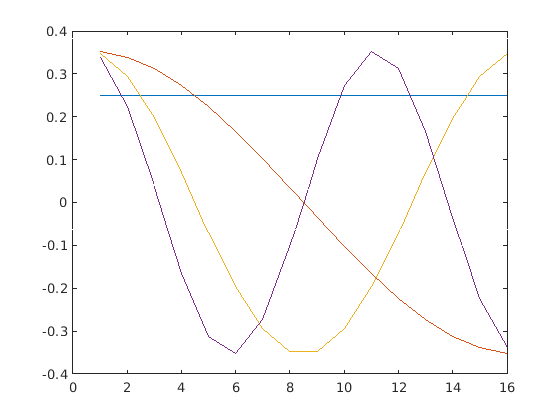

In [14]:
% Creating explicit matrix for fixed length L=16
D = frsynmatrix(F,16);
% and plot first 4 frame vectors
plot(D(:,1:4))

In [15]:
% Since the frame is ONB, the canonical dual frame is identical with the original.
frsyn(F,frana(F,[1:16]'))


ans =

    1.0000
    2.0000
    3.0000
    4.0000
    5.0000
    6.0000
    7.0000
    8.0000
    9.0000
   10.0000
   11.0000
   12.0000
   13.0000
   14.0000
   15.0000
   16.0000



In [16]:
% Discrete Fourier transform frame
F = frame('dft');
[A,B] = framebounds(F);
red = framered(F);
if A==1 && A==B && red==1
disp('Frame is an orthonormal basis.');
end

Frame is an orthonormal basis.


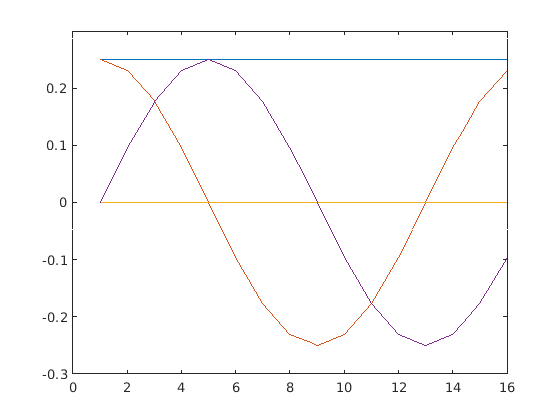

In [17]:
% Creating explicit matrix for fixed length L=16
D = frsynmatrix(F,16);
% ... and plot few vectors (real and imaginary parts separatelly)
plot([real(D(:,1:2)),imag(D(:,1:2))]); ylim([-0.3,0.3])

In [18]:
% Discrete wavelet transform frame
F = frame('fwt','syn:spline4:4',4);
[A,B] = framebounds(F,256)
red = framered(F)


A =

    0.0210


B =

    8.0000


red =

     1



$\Rightarrow$ Riez basis.

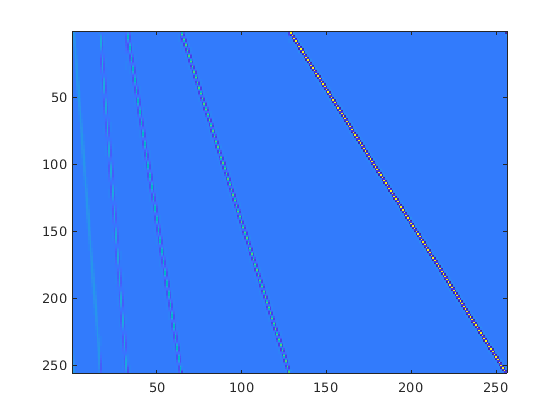

In [19]:
% Creating explicit matrix for fixed length L=256
D = frsynmatrix(F,256);
% Plot the matrix as an image
imagesc(D)

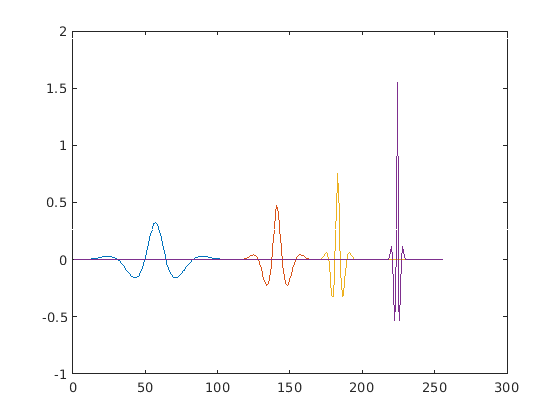

In [20]:
% Plot some representative vectors
plot(D(:,[20,50,110,240]))

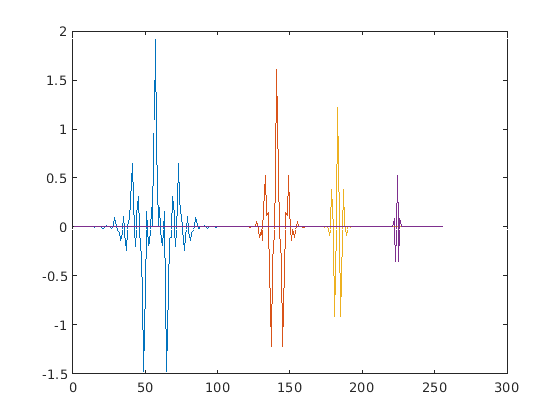

In [21]:
% The canonical dual frame is now not identical to the original.
Fd = framedual(F);
% Create an explicit matrix an plot vectors corresponding to the previous ones
Dd = frsynmatrix(Fd,256);
plot(Dd(:,[20,50,110,240]));

In [22]:
% Undecimated discrete wavelet transform frame
F = frame('ufwt','syn:spline4:4',4);
red = framered(F)
[A,B] = framebounds(F,256)


red =

     5


A =

    0.6537


B =

    4.0994



$\Rightarrow$ general frame.

In [23]:
% Create explicit matrices (this might take a while)
D = frsynmatrix(F,256);
Dd = frsynmatrix(framedual(F),256);

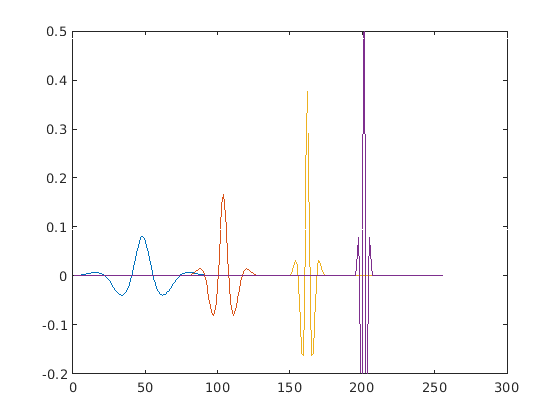

In [24]:
% Plot vectors from the original frame
plot(D(:,[256+40,2*256+100,3*256+160,4*256+200]));ylim([-0.2,0.5])

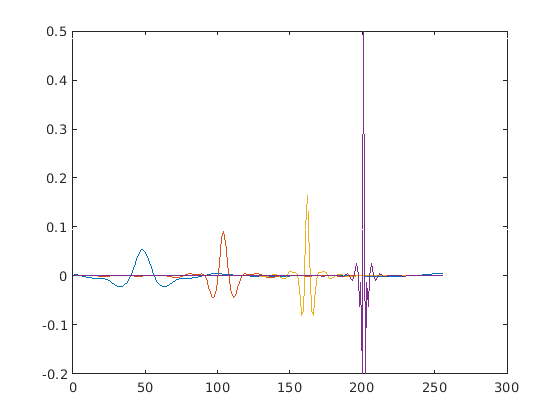

In [25]:
% Plot correcponding vectors from the cnanonical dual frame
plot(real(Dd(:,[256+40,2*256+100,3*256+160,4*256+200]))); ylim([-0.2,0.5])

In [45]:
% Gabor frame
F = frame('dgt',{'sqrthann',128},64,256);
red = framered(F)
[A,B] = framebounds(F,512)


red =

     4


A =

    4.0000


B =

    4.0000



$\Rightarrow$ tight frame.

In [46]:
% Explicit matrix
D = frsynmatrix(F,512);


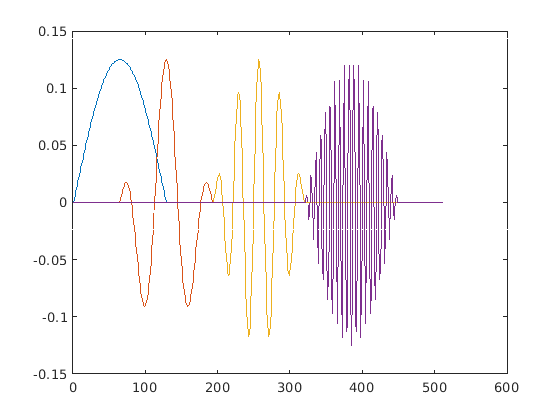

In [55]:
% Plot some frame vectors
plot(real(D(:,[256+1,2*256+5,4*256+10,6*256+40])))

In [57]:
% Special properties of tight frames:
% The canonical dual frame is just a scaled version of the original frame.
[A,B] = framebounds(F,512);
x = (1:512)';
norm(x - frsyn(F,frana(F,x))/4)
norm(x - frsyn(framedual(F),frana(F,x)))


ans =

   1.2117e-12


ans =

   1.0958e-12



Working with high dimensional audio signals
---

In [29]:
% Load a test signal, investigate the length
[x,fs] = gspi;
size(x)


ans =

      262144           1



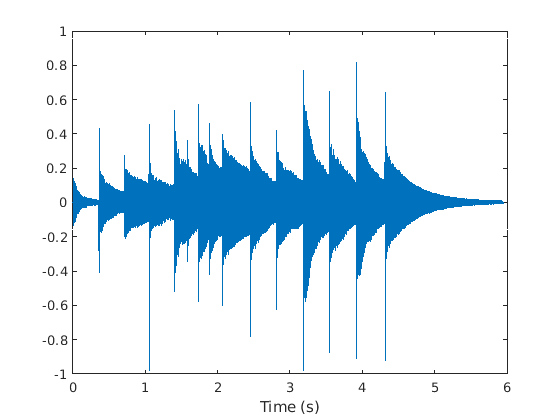

In [30]:
taxis = [0:numel(x)-1]'/fs;
plot(taxis,x);
xlabel('Time (s)');

In [31]:
% Define a Gabor frame
F = frame('dgt','hann',256,2048);
% Analysis
c = frana(F,x);
size(c)


ans =

     2097152           1



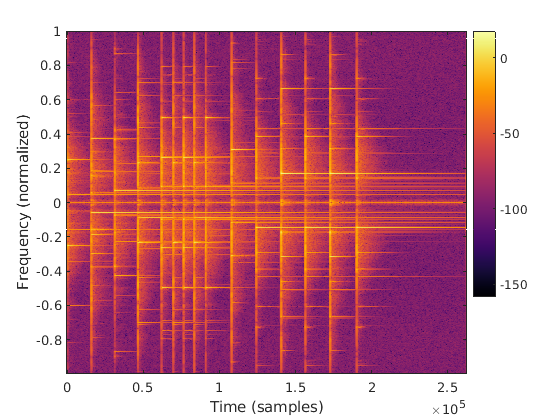

In [32]:
% Plot the coefficients in their native format (time-frequency plane)
plotframe(F,c)

In [33]:
% Convert to the native format
cnative = framecoef2native(F,c);
size(cnative)
% Use framenative2coef to convert back
% c is vectorized cnative i.e. columns stacted one after eachother.


ans =

        2048        1024



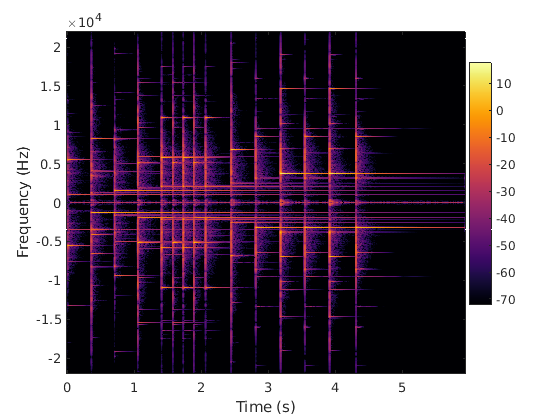

In [34]:
% Addjust the range of visible coefficients and add the sampling rate
plotframe(F,c,'dynrange',90,'fs',fs)


ans =

   1.0391e-14



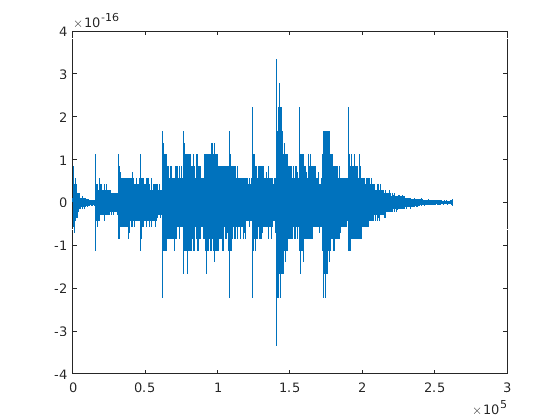

In [35]:
% Compute synthesis using canonical dual frame
xhat = real(frsyn(framedual(F),c));
% Print the norm of the error (also cut xhat to the length of x)
norm( x - postpad(xhat,numel(x)) )
% Plot the error
plot( x - postpad(xhat,numel(x)) )

Complex coefficient frames specialized for real signals
---
Working with the positive-frequency coefficients only since the negative frequency coefficients are just conjugate mirrored.

In [36]:
F = frame('dgtreal','hann',256,2048);
c = frana(F,x);
size(c)


ans =

     1049600           1



In [37]:
cnative = framecoef2native(F,c);
size(cnative)
c2 = framenative2coef(F,cnative);


ans =

        1025        1024



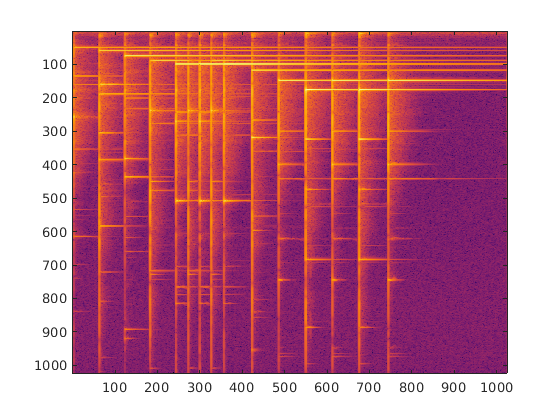

In [38]:
% Plot the coefficient matrix as is
imagesc(log(abs(cnative))); colormap(ltfat_inferno)

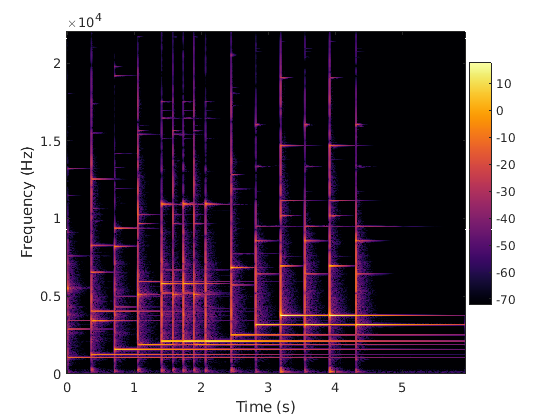

In [39]:
% Plot formatted
plotframe(F,c,'fs',fs,'dynrange',90)

In [40]:
% Synthetize with the can. dual frame
xhat = frsyn(framedual(F),c2);
% Print error
norm( x - postpad(xhat,numel(x)) )


ans =

   1.0641e-14



Exercise 1: Frequency band filtering by Gabor frame multiplier 
---
Remove frequency content from (roughly) 1000-3000 Hz using coefficient mask.

In [41]:
[x,fs] = gspi;
F = frame('dgtreal','hann',256,2048);

Exercise 2: Denoising by coefficient thresholding
---
Remove noise from the recording by setting coefficients with relative magnitude below -30 dB to zeros.

Exercise 3: Time stretching
---
Stretch the recording by using the the synthesis frame hop factor twice longer.
Multiply the phase of the coefficients by a factor of 2.

Exercise 4: Magnitude only reconstruction
---
Assume the phase of the coefficients is lost i.e. s = abs(c) is available but we still want to synthetize a signal.
1. Assing random phase to the coefficients, do syntehsis and perform reconstruction.
2. Implement the Griffin-Lim algorithm and listen to the result.

In [42]:
% Grif-Lim algorithm
% s = abs(frana(F,x));
% %Initialize coefficients
% c = 
% % Perform iterations
% for it = 1:100
%     c = frana(F,frsyn(Fd,c));
%     c = s.*exp(i*angle(c));
% end
